# 1. Importing Packages

In [17]:
import pandas as pd
import numpy as np

# 2. Importing Data

In [18]:
customer_df= pd.read_csv(
    "../input_data/olist_customers_dataset.csv"
)

geolocation_df= pd.read_csv(
    "../input_data/olist_geolocation_dataset.csv"
)

items_df= pd.read_csv(
    "../input_data/olist_order_items_dataset.csv"
)

payments_df= pd.read_csv(
    "../input_data/olist_order_payments_dataset.csv"
)

orders_df= pd.read_csv(
    "../input_data/olist_orders_dataset.csv"
)

products_df= pd.read_csv(
    "../input_data/olist_products_dataset.csv"
)

name_translation_df= pd.read_csv(
    "../input_data/product_category_name_translation.csv"
)

In [61]:
test = orders_df[['order_id', 'customer_id']].drop_duplicates().merge(customer_df[['customer_id', 'customer_unique_id']].drop_duplicates(), on='customer_id', how='left')

test = test.groupby('customer_unique_id').count().sort_values(by='order_id', ascending=True).reset_index()

In [60]:
test.head()

,customer_unique_id,order_id,customer_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1
1,a926cfc9bc7b082335de50450f48eec9,1,1
2,a926aae38267e7f54e67de9b5775d0a5,1,1
3,a92605ec492805540520d3a73aaeeb6e,1,1
4,a925c3e5df82fdc6082f1383d2834998,1,1


In [67]:
test = test[test.order_id > 1]

In [70]:
test.shape

(2997, 3)

/Users/diegosouza/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='order_id', ylabel='Density'>

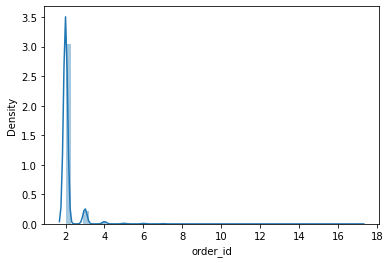

In [69]:
import seaborn as sns

sns.distplot(test.order_id)